In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import json
import sys
sys.path.append("../")
PATH = "../../"

from func_imputeScale import imputation_scaling

# Read data

In [2]:
''' Load data '''

with open(f"{PATH}/data/data_dtypes.json", "r") as f:
    dtypes = json.load(f)
data = pd.read_csv(f"{PATH}/data/old_versions/all_data_edited_v3_mgfaRecoded_inverse.csv", index_col=0, dtype=dtypes)

## Fix problem with integers accepting NAN 
tmp = data.select_dtypes(include=["float32"]).columns 
data[tmp] = data[tmp].astype(pd.Int64Dtype())

# Clean data

In [3]:
''' 
Removal variables with too much missingness
'''


missingess_per_var = (data.isna().sum() / data.shape[0])*100

cutoff_missingess_perc = 35
varKeep = missingess_per_var[missingess_per_var <= cutoff_missingess_perc].index

print(f"Keeping {len(varKeep)}/{data.shape[1]} variables")

data_clean = data.loc[:,varKeep]

print(f"\n\nDiscarded: {missingess_per_var[missingess_per_var > cutoff_missingess_perc].index.tolist()}")

Keeping 36/41 variables


Discarded: ['testergebnisdekrement_rb', 'testergebnispyridostigmin_rb', 'lrp4antikoerper_rb', 'histologie_sprb', 'scoreqmg_neu']


In [4]:
missingess_per_var

gender                                                        0.000000
zn_myasthener_krise_jn                                        0.000000
zn_myasthener_exazerbation                                    0.000000
aktueller_mgfa_score                                         24.917310
aktuelle_MGFA_umkodiert                                      24.917310
mgfaklassifikation_schlimmste_historisch_rb                   1.653804
okulaer                                                       5.347299
bulbaer                                                       7.111356
generalisiertemuskelschwaeche                                 6.725469
muskelschmerz                                                 9.151047
autoimmunerkrankungen_rbzu                                   20.672547
testergebnisdekrement_rb                                     47.574421
testergebnispyridostigmin_rb                                 42.557883
achrak_rb                                                     3.583241
antimu

In [5]:
''' 
Re-index MGFA score
'''

mfga_reindex = {"0":"0",       
                "1":"1",
                "2":"2",
                "3":"2",
                "4":"3",
                "5":"3",
                "6":"4",
                "7":"4",
                "8":"5"
}

data_clean.loc[:,["aktueller_mgfa_score","mgfaklassifikation_schlimmste_historisch_rb"]] = data_clean.loc[:,["aktueller_mgfa_score","mgfaklassifikation_schlimmste_historisch_rb"]].replace(mfga_reindex)

# Impute and scale

In [6]:
''' 
Impute and scale
'''

### Prepare Preprocessing ###
### get columns to apply transformation to ###
num_columns = data_clean.select_dtypes(include=["float64"]).columns
bin_columns = data_clean.select_dtypes(include=["int64"]).columns
cat_columns= data_clean.select_dtypes(include=["object"]).columns
preprocessor = imputation_scaling(num_columns, bin_columns, cat_columns, data)
columnOrderAfterPreprocessing = [ele[5:] for ele in preprocessor.get_feature_names_out()]

data_cleaned_imputedScaled = preprocessor.fit_transform(data_clean)

df_cleaned_imputedScaled = pd.DataFrame(data_cleaned_imputedScaled, columns=columnOrderAfterPreprocessing)
df_cleaned_imputedScaled

,age,age_erstmanifestation,age_bei_diagnose,Diagnosedauer,scoreqol_neu,scoreadl_neu,chronicfatigue_neu,seelischesbefinden_neu,gender,zn_myasthener_krise_jn,...,eculizumab_sprb,rituximab_sprb,exazerbationstherapie_grrb,plasmapherese_sprb,immunadsorption_sprb,ivig_sprb,seronegativ,aktueller_mgfa_score,aktuelle_MGFA_umkodiert,mgfaklassifikation_schlimmste_historisch_rb
0,0.62,0.616162,0.612245,0.090909,0.330453,0.041667,0.575758,0.523810,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,1.0
1,0.60,0.393939,0.408163,0.121212,0.543461,0.625000,0.333333,0.261905,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.4
2,0.60,0.545455,0.571429,0.136364,0.542373,0.375000,0.636364,0.523810,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,1.000000,0.4
3,0.64,0.646465,0.642857,0.090909,0.639837,0.237444,0.580993,0.179247,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.666667,0.2
4,0.82,0.740146,0.734694,0.120130,0.354371,0.197138,0.690660,0.069173,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.333333,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,0.60,0.585859,0.581633,0.090909,0.050847,0.000000,0.393939,0.071429,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,1.000000,0.4
1810,0.58,0.454545,0.448980,0.090909,0.553966,0.204219,0.578874,0.670581,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.4,0.666667,0.4
1811,0.68,0.536727,0.585192,0.252163,0.418267,0.177212,0.680309,0.420324,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.666667,0.2
1812,0.32,0.181818,0.183673,0.106061,0.000000,-0.081816,0.393939,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.4


In [7]:
df_cleaned_imputedScaled.columns

Index(['age', 'age_erstmanifestation', 'age_bei_diagnose', 'Diagnosedauer',
       'scoreqol_neu', 'scoreadl_neu', 'chronicfatigue_neu',
       'seelischesbefinden_neu', 'gender', 'zn_myasthener_krise_jn',
       'zn_myasthener_exazerbation', 'okulaer', 'bulbaer',
       'generalisiertemuskelschwaeche', 'muskelschmerz',
       'autoimmunerkrankungen_rbzu', 'achrak_rb', 'antimuskak_rb',
       'thymektomie_gr', 'pyridostigmin_sprb', 'immuntherapie_grrb',
       'kortison_sprb', 'azathioprin_sprb', 'methotrexatfolsauure_sprb',
       'mycophenolatmofetil_sprb',
       'eskalationstherapiebeitherapierefraktaerermyasthenie_grrb',
       'eculizumab_sprb', 'rituximab_sprb', 'exazerbationstherapie_grrb',
       'plasmapherese_sprb', 'immunadsorption_sprb', 'ivig_sprb',
       'seronegativ', 'aktueller_mgfa_score', 'aktuelle_MGFA_umkodiert',
       'mgfaklassifikation_schlimmste_historisch_rb'],
      dtype='object')

# Correlation heatmap

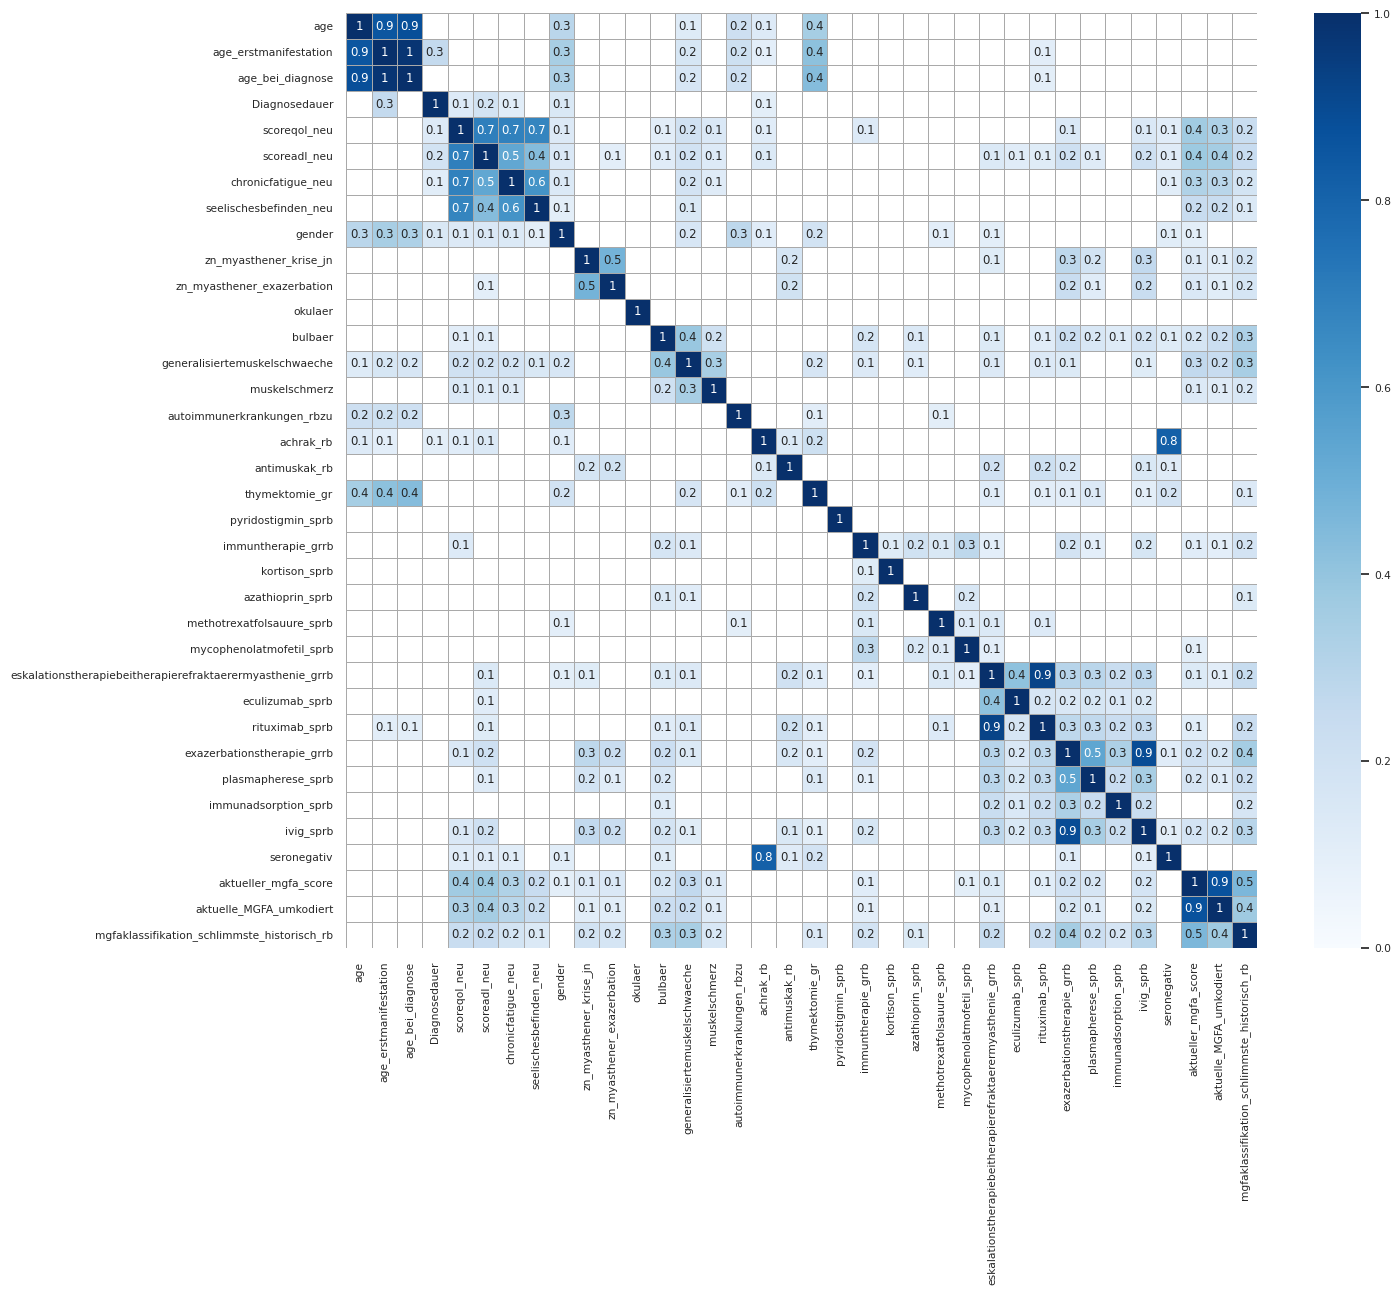

In [20]:
sns.set_theme(style="white", font_scale=.7)
crossCorr = abs(df_cleaned_imputedScaled.corr())

crossCorr = crossCorr[crossCorr > 0.1]
## cols with entries
#entry_yes = (crossCorr[crossCorr.mean() < 1]).index
#crossCorr = crossCorr.loc[entry_yes,entry_yes]

fig, ax = plt.subplots(figsize=(15,13))
mask = matrix = np.triu(crossCorr)
sns.heatmap(data=crossCorr,  vmin=0, vmax=1, fmt='.1g', xticklabels=True, yticklabels=True, cmap="Blues", ax=ax, annot=True, linewidth=.5, linecolor='darkgrey') #mask=mask, 
plt.tight_layout()
#fig.savefig(f"{PATH}/figures/correlation_v3.png", dpi=300)

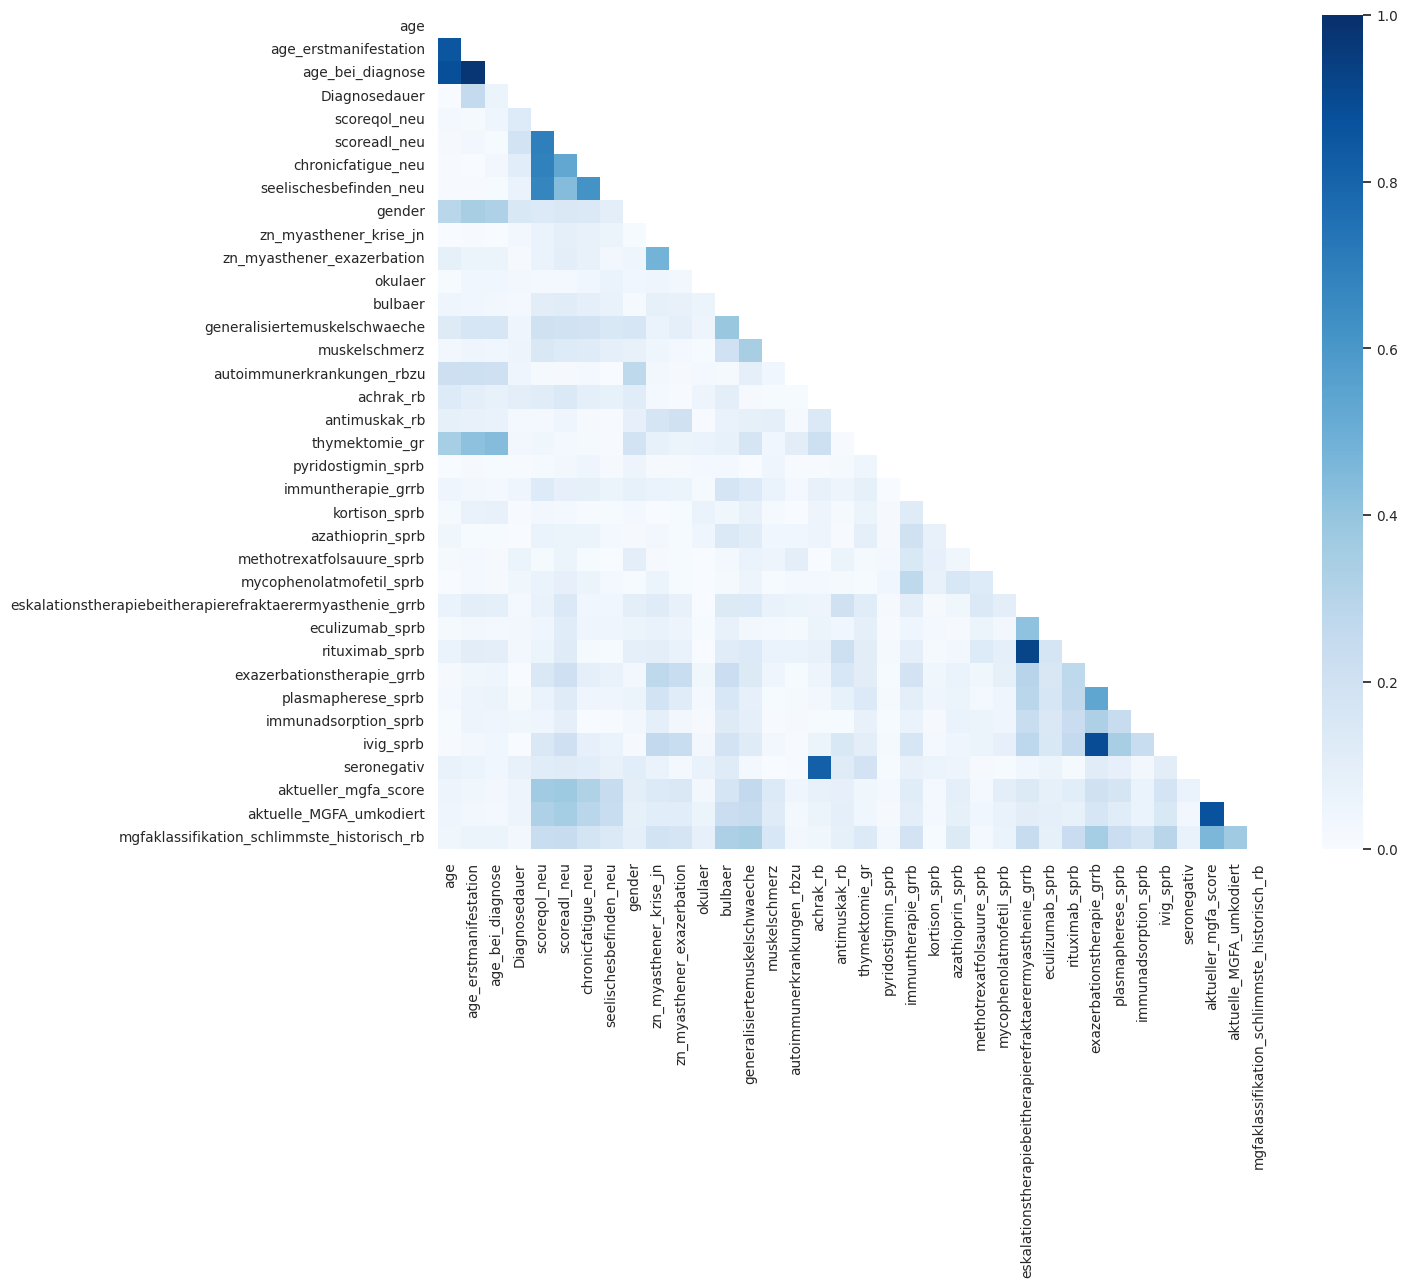

In [17]:
sns.set_theme(style="white", font_scale=.9)
crossCorr = abs(df_cleaned_imputedScaled.corr())

fig, ax = plt.subplots(figsize=(15,13))
mask = matrix = np.triu(crossCorr)
sns.heatmap(data=crossCorr,  vmin=0, vmax=1, fmt='.1g', xticklabels=True, mask=mask, yticklabels=True, cmap="Blues", ax=ax) # annot=True, linewidth=.5, linecolor='darkgrey'
plt.tight_layout()
#fig.savefig("f{PATH}/results/wholeDataset/figures/correlation_noAnnot.png", dpi=300)